In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(DBI)
library(dbplyr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Title: Predicting the Categorical Knowledge Level of a User from their Exam Performance on Electrical DC Machines 

Introduction: 
Regular studying, repetition, and testing can help students learn about an Electrical DC Machine effectively. Students, otherwise known as users, can employ various techniques to improve their knowledge level about Electrical DC Machines. These techniques include how much time they spend studying and repeating the goal-oriented materials, as well as their exam performance on these materials. These techniques can also include the review of related materials to Electrical DC Machines. 

In our study, we ask, "what will the user's knowledge be based on their examination performance on goal-oriented and related materials? 

For this project, we are using the UCI Machine Learning Repository's User Knowledge Modelling Data Set. 
This data set contains 6 columns, 5 of which are input variables and 1 of which is the target variable (the level of user knowledge). Two of the columns list the users' study time, two other columns list the users' exam performance and the last two describe the degree of repetition used and the users' knowledge level. Each row in this dataset contains the values for each of the 6 variables mentioned.

In [4]:
#Read training data set into R

library(readxl)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
training_data <- read_excel("data.xls", sheet = 2) #'sheet = 2' is for training data

training_data_tidy <- select(training_data, STG:UNS) %>%
rename("goal_study_time" = STG, "goal_repetition_number_of_user" = SCG, "related_study_time" = STR, "related_exam_performance" = LPR, "goal_exam_performance" = PEG, "user_knowledge" = UNS)

training_data_tidy

New names:
* `` -> ...7
* `` -> ...8



goal_study_time,goal_repetition_number_of_user,related_study_time,related_exam_performance,goal_exam_performance,user_knowledge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [5]:
#Read testing data set into R

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
testing_data <- read_excel("data.xls", sheet = 3) #'sheet = 3' is for testing data

testing_data_tidy <- select(testing_data, STG:UNS) %>%
rename("goal_study_time" = STG, "goal_repetition_number_of_user" = SCG, "related_study_time" = STR, "related_exam_performance" = LPR, "goal_exam_performance" = PEG, "user_knowledge" = UNS)

testing_data_tidy

New names:
* `` -> ...7
* `` -> ...8



goal_study_time,goal_repetition_number_of_user,related_study_time,related_exam_performance,goal_exam_performance,user_knowledge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


Methods:

Data Analysis:
We will use a K-nearest neighbour classification with cross-validation to conduct our data analysis. The KNN classification model will need to be trained, evaluated, and tuned with training and testing sets before predicting the user knowledge. By using a KNN classification with cross-validation, we will plot the accuracy of K and find the highest accuracy to find the K value we want; this will lead to a more effective model. For this analysis, we will employ three columns from the data set. Two predictor variables, the examination performance of the goal object materials and related objects, will be used to predict the users' knowledge level (low, medium, high). 

Visualization: 
To visualize our results, we will place the goal-oriented examination performance on the x-axis and the related objects examination performance on the y-axis. The user knowledge category will be colour-coded on the plot with 3 colours encoded into the aesthetics of the scatter plot. 

Expectations and Impacts: 
We expect to find that a better exam performance on both study objects, whether it be directly related or indirectly related to Electrical DC Machines, will predict high user knowledge (a positive medium-strength relationship). Conversely, a lower user knowledge would mean a lower exam performance was achieved on both study objects.  By finding the threshold for the exam score needed to get to a high user knowledge level, other users studying Electrical DC Circuits can be better informed about what score they should aim for on a test. 

Future questions:
Were there statistics that were not included in the given dataset that could improve the effectiveness of the model?
Do certain statistics influence the user knowledge more? If so, would there be abetter weight function to use in the classification engine?
How does study time or repetition of the different objects affect user knowledge? 
Would more data collection into the related objects involved in exam performance help differentiate which indirect objects lead to better user knowledge?

Changes.





In [9]:
knowledge_proportions_train <- training_data_tidy %>%
group_by(user_knowledge) %>%
summarise(n = n()) %>%
mutate(percent = 100*n/nrow(training_data_tidy))

knowledge_proportions_test <- testing_data_tidy %>%
group_by(user_knowledge) %>%
summarise(n = n()) %>%
mutate(percent = 100*n/nrow(testing_data_tidy))

knowledge_proportions_train
knowledge_proportions_test

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



user_knowledge,n,percent
<chr>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
very_low,24,9.302326


user_knowledge,n,percent
<chr>,<int>,<dbl>
High,39,26.89655
Low,46,31.72414
Middle,34,23.44828
Very Low,26,17.93103


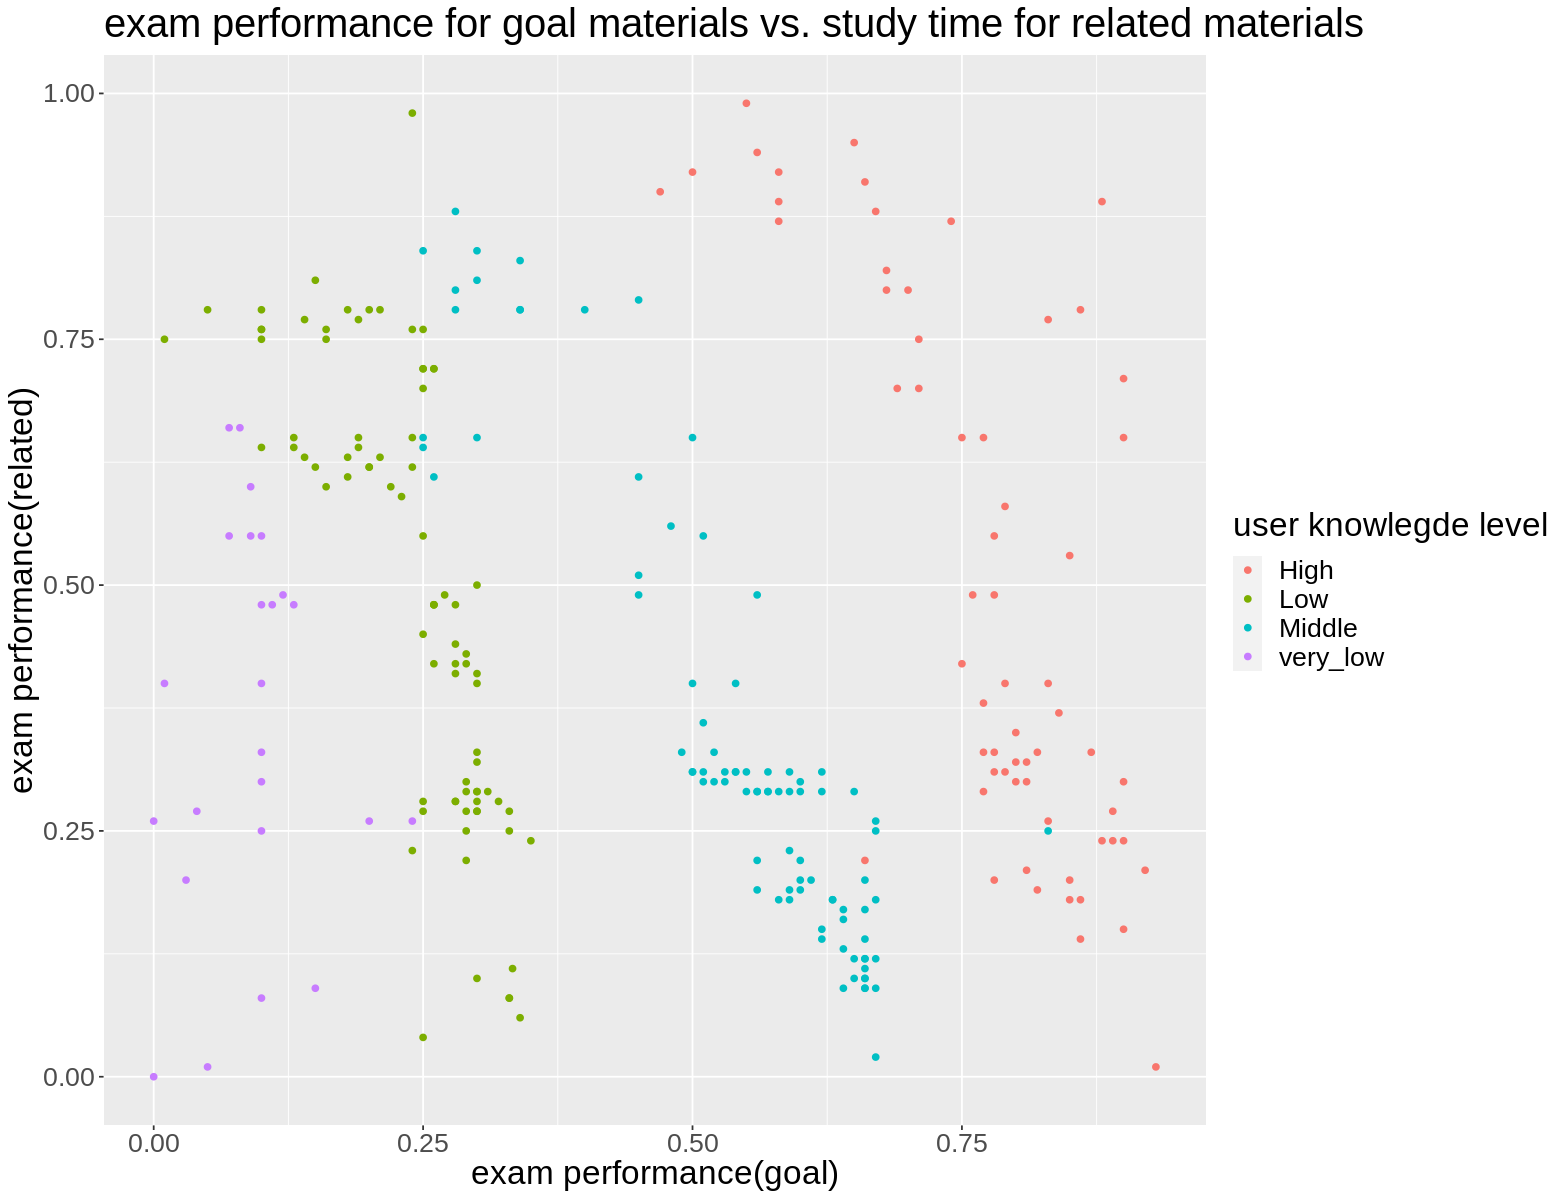

In [6]:
#Check if there is relationship between both types of exam performance and user knowledge

options(repr.plot.width = 13, repr.plot.height = 10)

plot <- ggplot(training_data_tidy, aes(x = goal_exam_performance, y = related_exam_performance, color = user_knowledge)) + 
    geom_point() +
    labs(x = "exam performance(goal)", y = "exam performance(related)", color = "user knowlegde level") +
    theme(text = element_text(size = 20)) + 
    ggtitle("exam performance for goal materials vs. study time for related materials") 

plot

From the plot above we can see that at where both types of exam performance are low, the user knowledge level are generally very low(purple dots), and the high user knowledge generally exists at area where both types of exam performance are high. Therefore, this illustrates that there is a relationship between both types of exam performance and the level of user knowledge as well as both types of exam performance should be good predictors to predict the level of user knowledge.

! Fold3: internal: No observations were detected in `truth` for level(s): 'very_l...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9538348,5,0.01563576,Model01
2,accuracy,multiclass,0.9538348,5,0.01563576,Model02
3,accuracy,multiclass,0.9455329,5,0.01309863,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,accuracy,multiclass,0.9222239,5,0.01657857,Model13
14,accuracy,multiclass,0.9222239,5,0.01657857,Model14
15,accuracy,multiclass,0.8991383,5,0.01296801,Model15


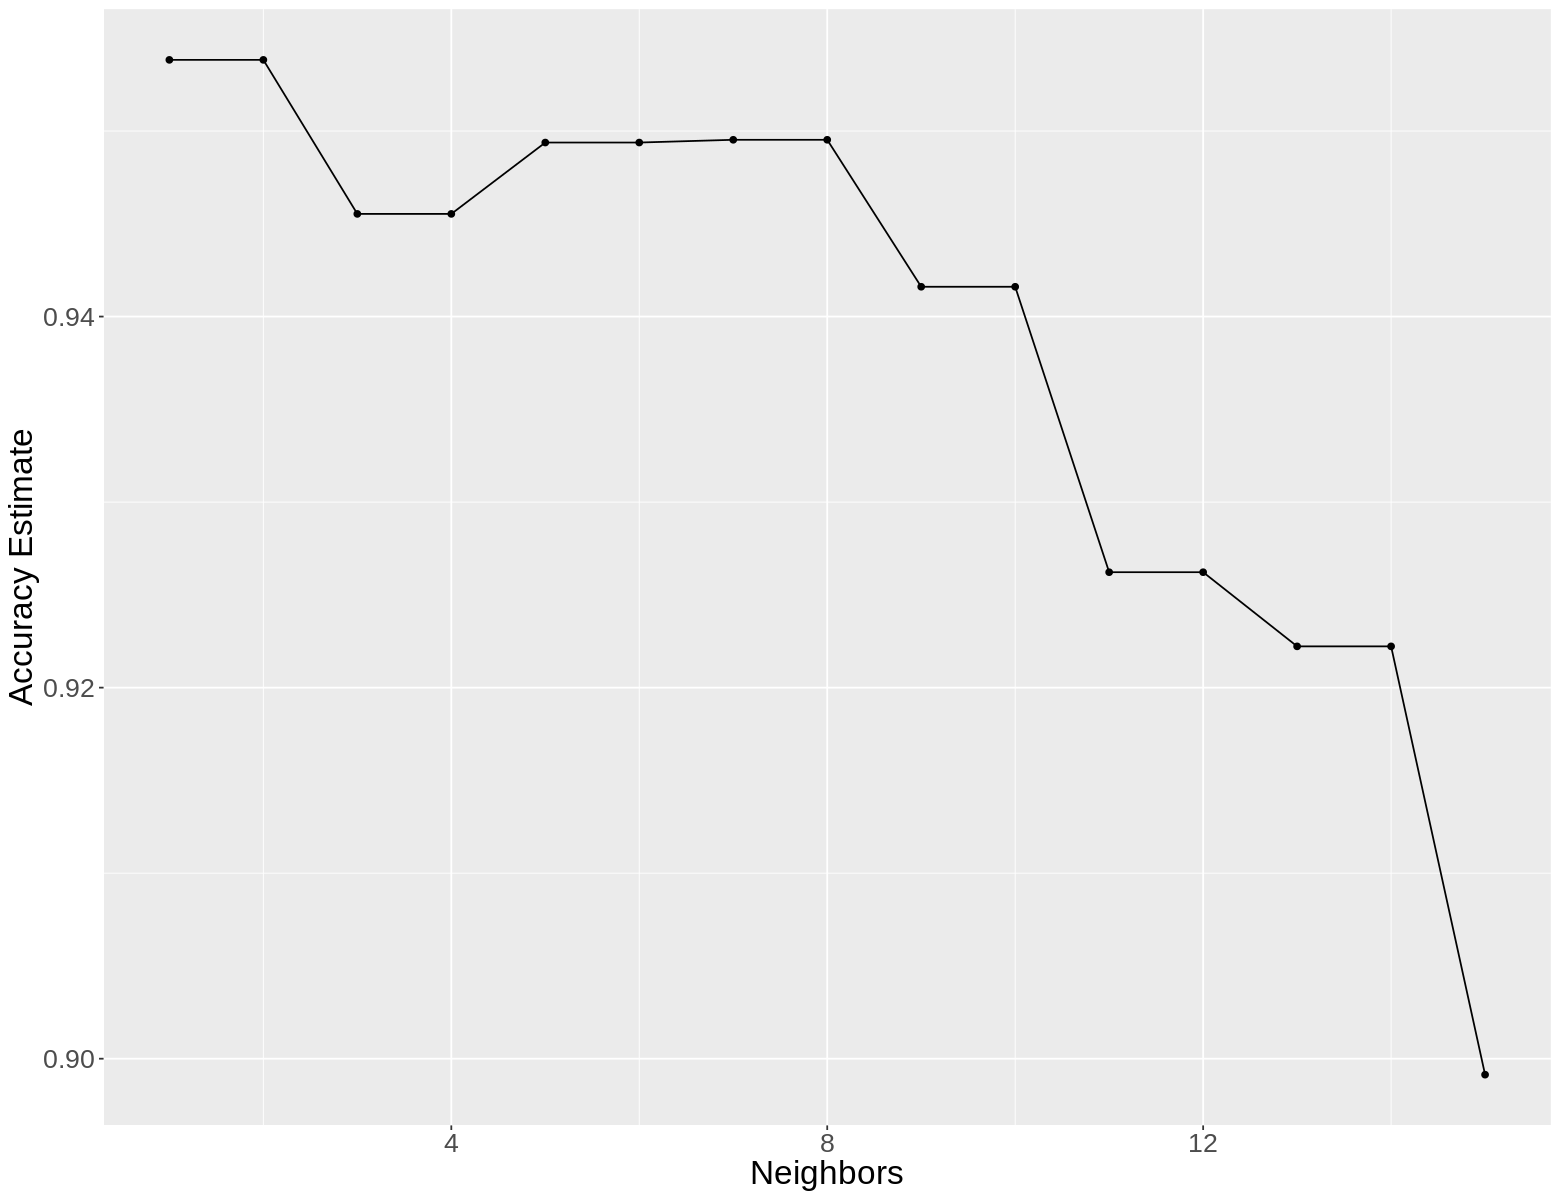

In [7]:
#Find the K-value that gives the highest accuracy

set.seed(1)

knowledge_recipe <- recipe(user_knowledge ~ goal_exam_performance + related_exam_performance, data = training_data_tidy) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())
                                            
knowledge_vfold <- vfold_cv(training_data_tidy, v = 5, strata = user_knowledge)
                                       
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")
                  
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1)) 

knn_results <- workflow() %>%
add_recipe(knowledge_recipe) %>%
add_model(knn_tune) %>%
tune_grid(resamples = knowledge_vfold, grid = k_vals) %>%
collect_metrics()
          
accuracies <- knn_results %>%
filter(.metric == "accuracy")
    
accuracies

accuracy_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate")+
theme(text = element_text(size =20))

accuracy_plot

In [8]:
#Build model with the best K-value

set.seed(2)

bestk_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 2) %>%
set_engine("kknn") %>%
set_mode("classification")

bestk_fit <- workflow() %>%
add_recipe(knowledge_recipe) %>%
add_model(bestk_spec) %>%
fit(data = training_data_tidy)

bestk_fit

#Finally, using testing data set to predict

bestk_predictions <- predict(bestk_fit, testing_data_tidy) %>%
bind_cols(testing_data_tidy)

bestk_predictions

bestk_metrics <- bestk_predictions %>%
metrics(truth = user_knowledge, estimate = .pred_class)

bestk_conf_mat <- bestk_predictions %>%
conf_mat(truth = user_knowledge, estimate = .pred_class)

bestk_conf_mat

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~2, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.06589147
Best kernel: rectangular
Best k: 2

.pred_class,goal_study_time,goal_repetition_number_of_user,related_study_time,related_exam_performance,goal_exam_performance,user_knowledge
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
very_low,0.00,0.10,0.50,0.26,0.05,Very Low
Low,0.05,0.05,0.55,0.60,0.14,Low
High,0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Low,0.56,0.60,0.77,0.13,0.32,Low
Middle,0.66,0.68,0.81,0.57,0.57,Middle
Low,0.68,0.64,0.79,0.97,0.24,Middle


ERROR: Error: `estimate` should be numeric
